# ***Data Visualization***

>[Data Visualization](#scrollTo=KFGirml-CWMn)

>>[Diamonds Data-set](#scrollTo=BAdOacyKy0jy)

>>>[About the diamonds dataset](#scrollTo=BAdOacyKy0jy)

>>[Get familiar with the data](#scrollTo=ZhXdZ0-AzXgc)

>>[Perform feature engineering, and do linear regression to predict the price.](#scrollTo=m5KDBAw7RrGW)



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## ***Diamonds Data-set***

We will use the diamonds data set and do exercises to practice using pandas, seaborn and prepare the data-set to perform regression.

Diamonds dataset is available to load from seaborn.

### *About the diamonds dataset*

1. carat - weight of the diamond
2. cut - quality of the cut
3. color - diamond colour
4. clarity - a measurement quantifying clarity of the the diamond
5. depth - total depth percentage = z / mean(x, y) = 2 * z / (x + y)
6. table - width of top of diamond relative to widest point
7. price - price in US dollars
8. x - length in mm
9. y - width in mm
10. z - depth in mm

In [ ]:
df = sns.load_dataset('diamonds')
print(df.shape) # how many data points (rows), and how many attributes (columns)
df.head()


(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## ***Get familiar with the data***

1. Find the number of data points and attributes
2. Find the range of numerical values, and get its statistics
3. Find the unique entries of string values. Explore if the string values are categories.
4. Plot the distribution of price. Make a density plot.
5. Do a scatter plot of price and carat.
6. Find the pair-wise correlation of all numerical values. Plot a heatmap. Adjust the figsize and ensure that the heatmap looks good.
7. Do a pair-plot with color as the hue.
8. Do a boxplot and violinplot of the categorical variables - color and clarity

Check this great resource for figure aesthetics -

http://seaborn.pydata.org/tutorial/aesthetics.html

**Q1:Find the number of data points and attributes**

In [ ]:
print(df.shape)

(53940, 10)


**Q2:Find the range of numerical values, and get its statistics**

In [ ]:
#checking for null values
df.isnull().values.any()

False

In [ ]:
#statistics for numerical features
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Q3: Find the unique entries of string values. Explore if the string values are categories.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


In [ ]:
d2=df.select_dtypes(include=['category'])
print(d2.head())

       cut color clarity
0    Ideal     E     SI2
1  Premium     E     SI1
2     Good     E     VS1
3  Premium     I     VS2
4     Good     J     SI2


**Q4: Plot the distribution of price. Make a density plot.**

<Axes: xlabel='price', ylabel='Count'>

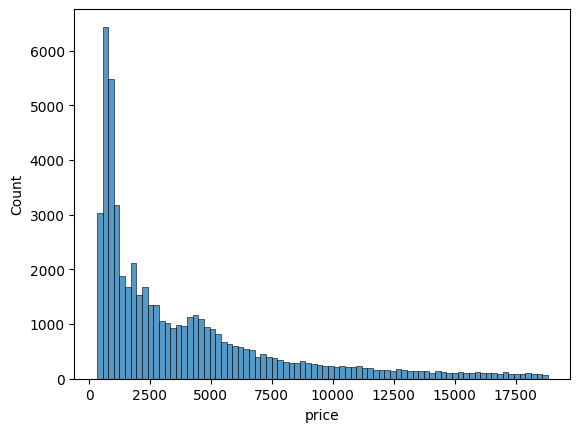

In [ ]:
sns.histplot(df, x='price')

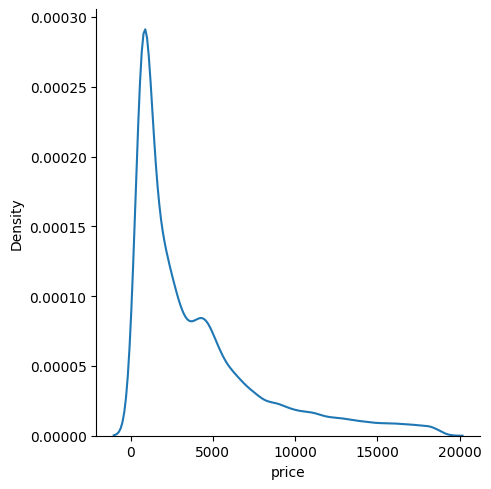

In [ ]:
sns.displot(data=df, x="price", kind="kde")

**Q5: Do a scatter plot of price and carat.**

<Axes: xlabel='price', ylabel='carat'>

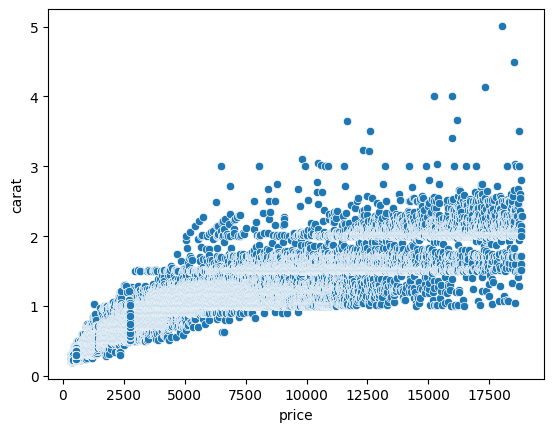

In [ ]:
sns.scatterplot(data=df, x="price", y="carat")


**Q6. Find the pair-wise correlation of all numerical values. Plot a heatmap. Adjust the figsize and ensure that the heatmap looks good.**

In [ ]:
# Convert the 'cut' column to numerical values
df['cut'] = df['cut'].replace({'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4})

# Convert the 'clarity' column to numerical values
df['clarity'] = df['clarity'].replace({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

# Convert the 'color' column to numerical values
df['color'] = df['color'].replace({'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}) # Map color grades to numbers

# Calculate the correlation matrix
df.corr(method='pearson')

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

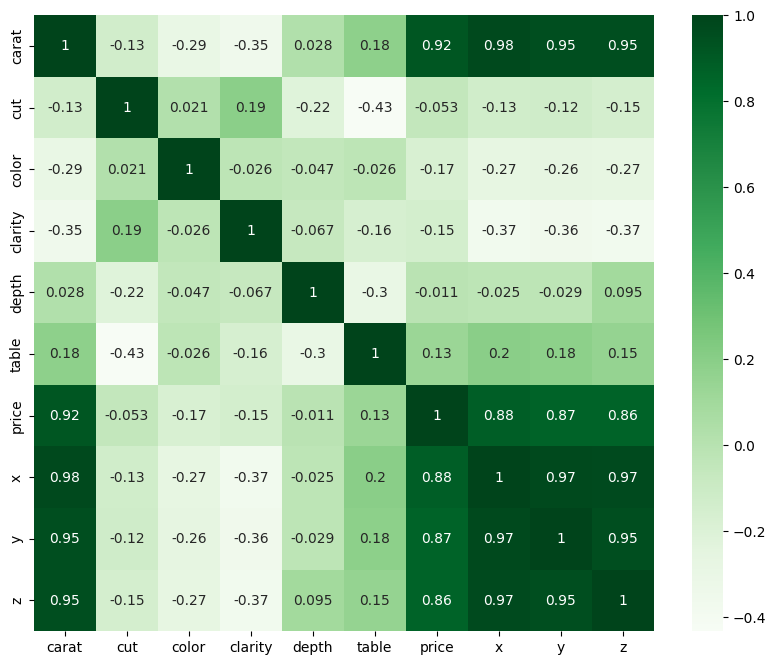

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

**Q7. Do a pair-plot with color as the hue.**

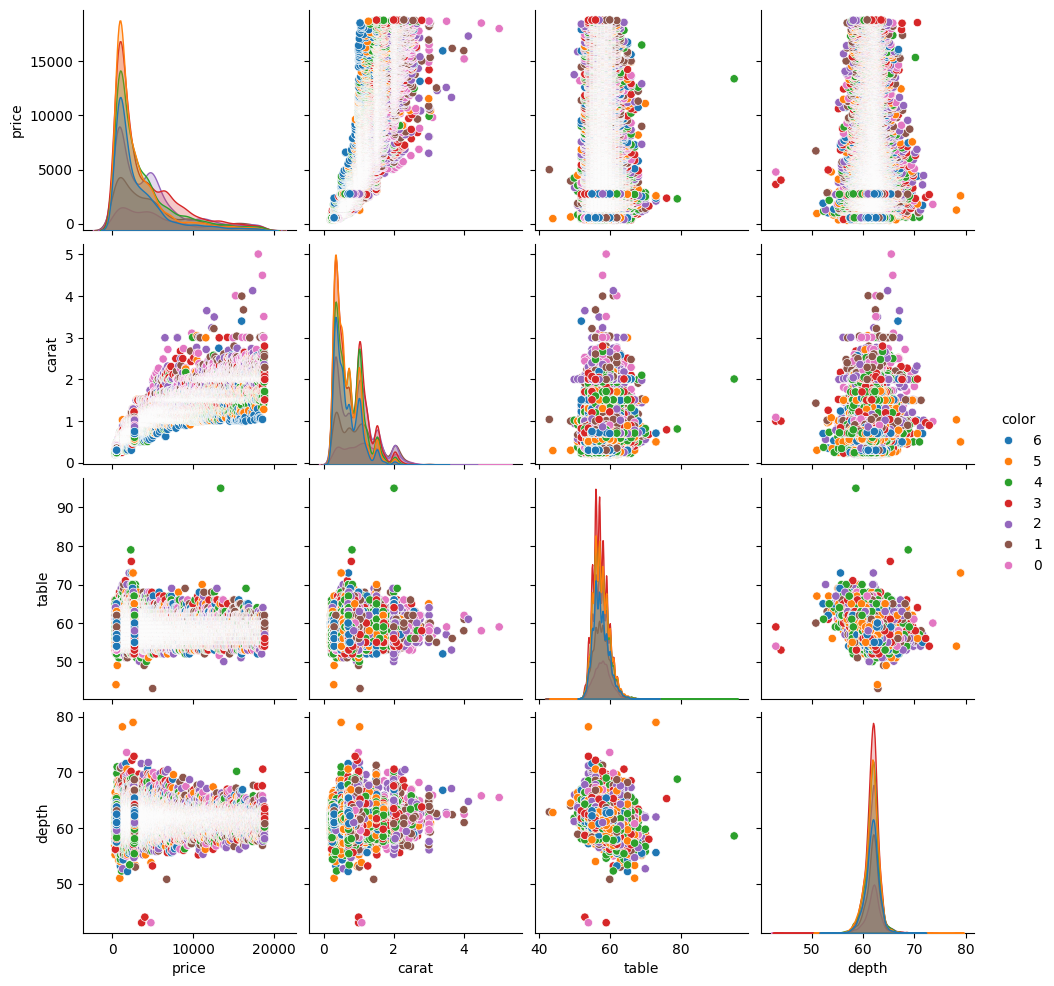

In [ ]:
sns.pairplot(df,vars=['price','carat','table','depth'],hue='color')

**Q8. Do a boxplot and violinplot of the categorical variables - color and clarity.**

<Axes: xlabel='clarity', ylabel='price'>

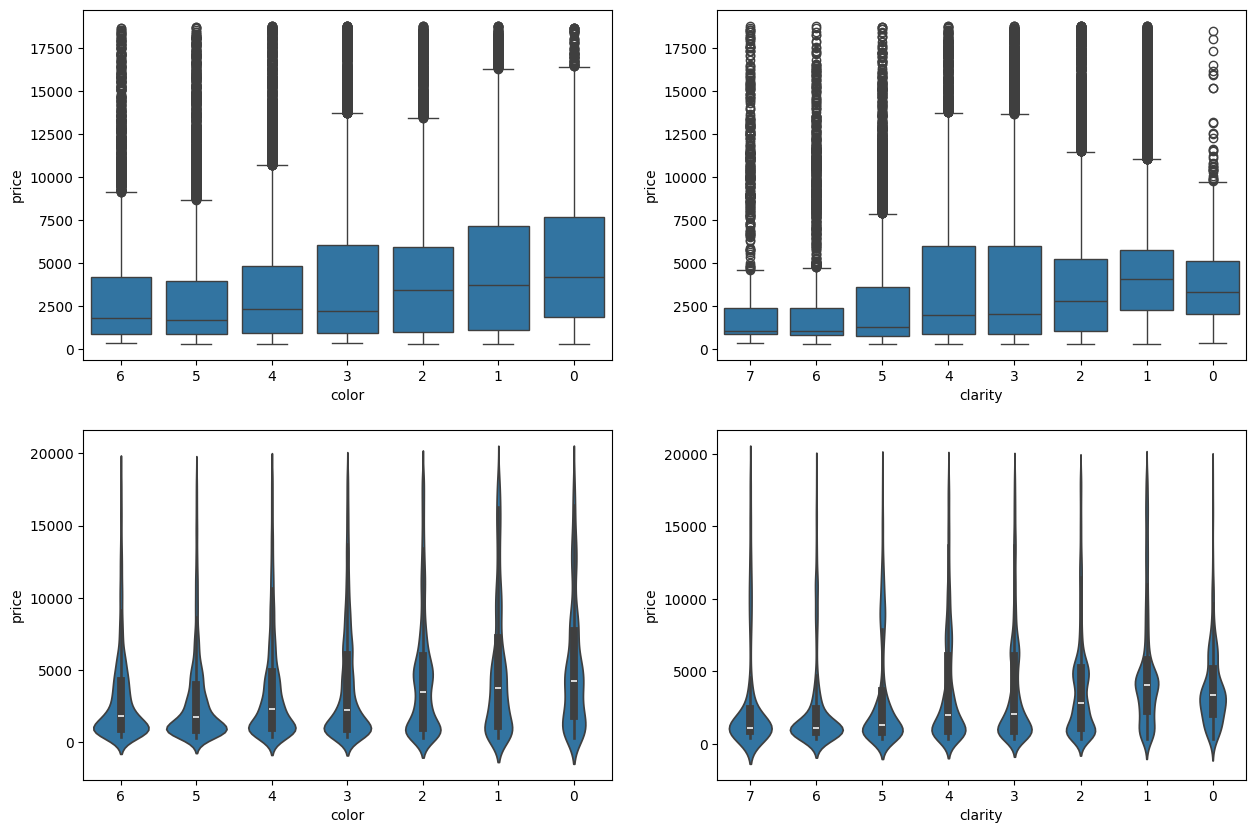

In [ ]:
f = plt.figure(figsize=(15, 10))
gs = f.add_gridspec(2, 2)
ax = f.add_subplot(gs[0, 0])
sns.boxplot(data=df,x='color',y='price')
ax = f.add_subplot(gs[0, 1])
sns.boxplot(data=df,x='clarity',y='price')
ax = f.add_subplot(gs[1, 0])
sns.violinplot(data=df,x='color',y='price')
ax = f.add_subplot(gs[1, 1])
sns.violinplot(data=df,x='clarity',y='price')

## ***Perform feature engineering, and do linear regression to predict the price.***

1. Convert catergorical variable to a form that can be used in regression by one-hot-encoding using sklearn.

2. Do a linear regression model with price as the output, and carat, depth and table as the input features.

3. Add the catergorical variables also as a feature and perform regression.


**Q1:Convert catergorical variable to a form that can be used in regression by one-hot-encoding using sklearn.**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc_df=pd.get_dummies(df)
print(enc_df.shape)
print(enc_df.head())

(53940, 27)
   carat  depth  table  price     x     y     z  cut_4  cut_3  cut_2  ...  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43   True  False  False  ...   
1   0.21   59.8   61.0    326  3.89  3.84  2.31  False   True  False  ...   
2   0.23   56.9   65.0    327  4.05  4.07  2.31  False  False  False  ...   
3   0.29   62.4   58.0    334  4.20  4.23  2.63  False   True  False  ...   
4   0.31   63.3   58.0    335  4.34  4.35  2.75  False  False  False  ...   

   color_1  color_0  clarity_7  clarity_6  clarity_5  clarity_4  clarity_3  \
0    False    False      False      False      False      False      False   
1    False    False      False      False      False      False      False   
2    False    False      False      False      False       True      False   
3     True    False      False      False      False      False       True   
4    False     True      False      False      False      False      False   

   clarity_2  clarity_1  clarity_0  
0      False       

**Q2:Do a linear regression model with price as the output, and carat, depth and table as the input features.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=enc_df[["carat", "depth","table"]]
Y=enc_df[["price"]]
Y1 = np.log(Y)
print(X.shape)
print(Y.shape)


(53940, 3)
(53940, 1)


In [ ]:
#Split train and validation data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)


LinearRegression()

In [ ]:
Y_pred = lin_reg.predict(X_test)

In [ ]:
print(lin_reg.score(X_test,Y_test))

0.8515677590521775


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y1,test_size=0.2, random_state=10)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
Y_pred = lin_reg.predict(X_test)
print(lin_reg.score(X_test,Y_test))


0.8460814139259992


In [ ]:
print(type(Y_test))
print(type(Y_pred))
print(Y_test)
print(Y_pred)


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
          price
8018   8.373323
1583   8.009031
9138   8.420021
2787   8.088562
52429  7.829233
...         ...
38757  6.952729
28848  6.526495
35154  6.791221
21245  9.147826
38576  6.942157

[10788 rows x 1 columns]
[[8.22253585]
 [7.61960218]
 [8.47824445]
 ...
 [7.00497736]
 [9.18586944]
 [6.94548227]]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(mse)
print(r2)

0.1596717235979112
0.8460814139259992


**Model with Standardization**

In [ ]:
#

**Q3:Add the catergorical variables also as a feature and perform regression.**

In [ ]:
#

Some additional transformation

<Axes: ylabel='Count'>

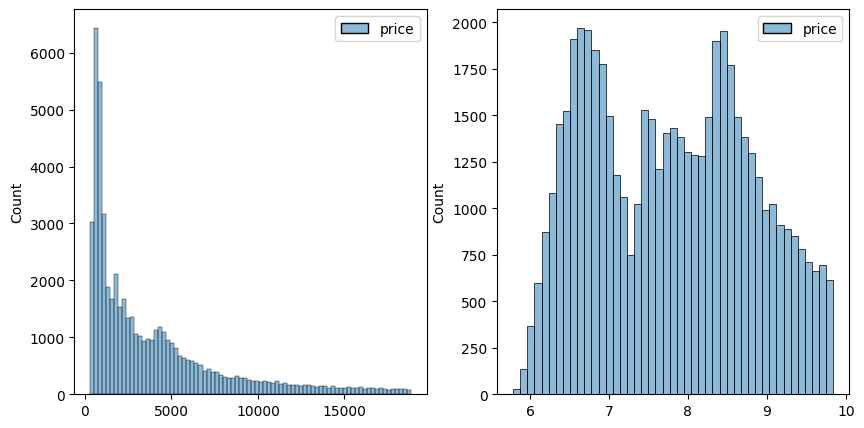

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(Y)
plt.subplot(1,2,2)
sns.histplot(Y1)